In [12]:
!pip install keras_preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1: rock, 2: paper, 3:scissors

In [2]:
train_df = pd.read_csv("/kaggle/input/rps-dataset/train.csv", index_col=[0]).dropna()
test_df = pd.read_csv("/kaggle/input/rps-dataset/test.csv", index_col=[0]).dropna()
train_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,label
0,0.428319,0.849283,-1.439019e-06,0.304951,0.750636,-0.048618,0.221491,0.608732,-0.080840,0.274161,...,0.611409,0.447357,-0.109300,0.580658,0.524707,-0.079451,0.562488,0.572707,-0.049376,0.0
1,0.437464,0.846336,-1.451697e-06,0.311815,0.743393,-0.051680,0.226206,0.598345,-0.085505,0.281664,...,0.620621,0.434972,-0.111122,0.591545,0.514515,-0.080738,0.574497,0.558977,-0.049827,0.0
2,0.431653,0.828476,-1.491743e-06,0.306135,0.731148,-0.050910,0.228144,0.570445,-0.078350,0.295679,...,0.619679,0.407655,-0.100686,0.594929,0.488175,-0.071169,0.576328,0.537058,-0.041385,0.0
3,0.249888,0.758573,-7.085095e-07,0.458062,0.673084,-0.018649,0.565394,0.543146,0.018403,0.631895,...,0.356026,0.392853,0.239313,0.390221,0.434388,0.238401,0.392914,0.478945,0.229464,0.0
4,0.270631,0.733275,-8.289637e-07,0.460249,0.676581,0.091075,0.533386,0.573067,0.165641,0.510393,...,0.243840,0.419537,0.247544,0.258317,0.471570,0.272799,0.255516,0.513503,0.275212,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0.371639,0.141911,-3.767227e-07,0.369488,0.196982,-0.150892,0.407294,0.225760,-0.231879,0.452705,...,0.510749,-0.033029,-0.122732,0.466555,0.004196,-0.122935,0.466401,0.039233,-0.109982,2.0
4988,0.098400,0.352260,-2.946348e-07,0.256455,0.314345,-0.025265,0.352932,0.426703,-0.078110,0.347945,...,0.207267,0.781148,-0.215703,0.168648,0.771013,-0.187687,0.139645,0.726556,-0.167463,2.0
4990,-0.002833,0.454254,-1.021530e-06,0.181792,0.442145,-0.109308,0.355642,0.533102,-0.156276,0.466291,...,0.174453,0.910185,-0.035231,0.196646,0.858058,-0.029740,0.173771,0.804926,-0.014766,2.0
4991,0.242910,1.006647,-1.026571e-06,0.210052,0.835242,0.097660,0.291117,0.613456,0.115921,0.390832,...,0.804821,0.890149,-0.133105,0.750591,0.954505,-0.101990,0.675307,0.948530,-0.080426,2.0


In [3]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,label
0,0.486882,0.848574,-1.008494e-06,0.692309,0.706953,-0.035040,0.799387,0.551255,-0.012334,0.753238,...,0.272638,0.361109,0.058261,0.288172,0.439625,0.048772,0.322043,0.539168,0.058038,0.0
1,0.436762,0.507132,-3.561523e-07,0.543030,0.504540,-0.111552,0.665867,0.472674,-0.211763,0.757620,...,0.349115,0.357433,-0.379092,0.385724,0.460393,-0.385161,0.384594,0.502754,-0.372560,0.0
2,0.499623,0.807959,-1.231759e-06,0.712691,0.697068,-0.012687,0.814074,0.551507,0.047835,0.766878,...,0.296288,0.368227,0.147496,0.288693,0.448195,0.129977,0.327409,0.547290,0.134370,0.0
6,0.610373,0.284746,-1.439194e-06,0.733493,0.334442,-0.096852,0.852108,0.411140,-0.217996,0.887565,...,0.471120,0.390496,-0.524509,0.511151,0.546027,-0.537537,0.558249,0.621865,-0.544693,0.0
7,0.882845,0.329751,-1.671242e-06,0.709773,0.412681,-0.076998,0.585746,0.460186,-0.173005,0.510893,...,0.868093,0.342472,-0.574900,0.870781,0.503733,-0.586404,0.877509,0.579682,-0.579909,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.628611,0.805780,5.317990e-07,0.561234,0.797621,0.330842,0.502720,0.736674,0.555734,0.476530,...,0.516139,0.359150,0.365898,0.474528,0.362861,0.392582,0.461996,0.355273,0.403934,2.0
279,0.302057,0.719433,-1.122252e-06,0.450796,0.569483,0.238269,0.559134,0.451613,0.425629,0.655585,...,0.115176,0.597282,0.617042,0.168262,0.622068,0.664968,0.199499,0.625194,0.678254,2.0
282,0.308315,0.650525,-8.134304e-07,0.366324,0.495690,0.226016,0.463804,0.436277,0.436545,0.556778,...,0.353400,0.711481,0.738022,0.408983,0.678616,0.758615,0.436373,0.643841,0.759680,2.0
289,0.629853,0.915415,5.892140e-07,0.487363,0.883983,0.304324,0.420284,0.783861,0.528235,0.409874,...,0.727961,0.583841,0.484121,0.696379,0.661901,0.492834,0.677371,0.709384,0.478902,2.0


(array([1070.,    0.,    0.,    0.,    0., 1050.,    0.,    0.,    0.,
        1101.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

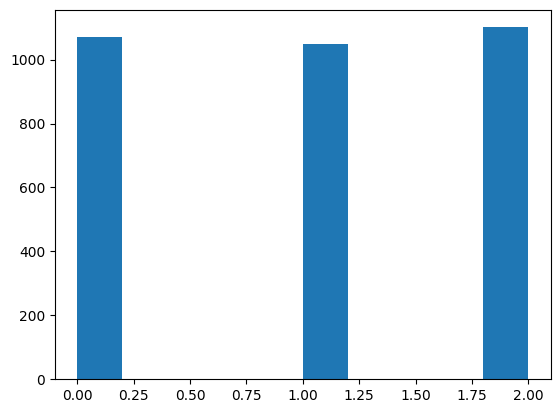

In [4]:
plt.hist(train_df['label'])

(array([44.,  0.,  0.,  0.,  0., 57.,  0.,  0.,  0., 40.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

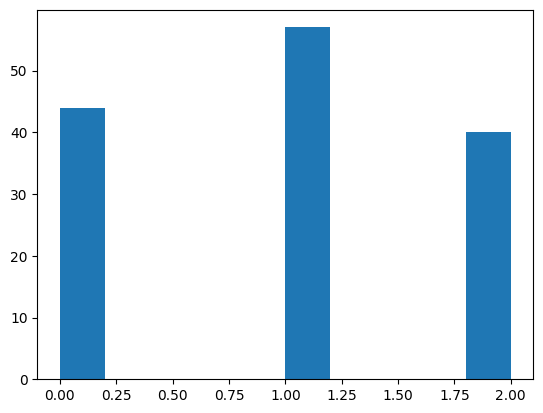

In [5]:
plt.hist(test_df['label'])

In [6]:
train_df.skew()

0        0.091637
1       -1.662644
2        0.000000
3       -0.028733
4       -1.498913
           ...   
59       0.642539
60       0.110773
61      -0.249744
62       0.584188
label   -0.017785
Length: 64, dtype: float64

In [7]:
x_train = train_df.drop(columns=['label'])
y_train = train_df['label']
x_test = test_df.drop(columns=['label'])
y_test = test_df['label']

In [8]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.428319,0.849283,-1.439019e-06,0.304951,0.750636,-0.048618,0.221491,0.608732,-0.080840,0.274161,...,-0.081637,0.611409,0.447357,-0.109300,0.580658,0.524707,-0.079451,0.562488,0.572707,-0.049376
1,0.437464,0.846336,-1.451697e-06,0.311815,0.743393,-0.051680,0.226206,0.598345,-0.085505,0.281664,...,-0.082513,0.620621,0.434972,-0.111122,0.591545,0.514515,-0.080738,0.574497,0.558977,-0.049827
2,0.431653,0.828476,-1.491743e-06,0.306135,0.731148,-0.050910,0.228144,0.570445,-0.078350,0.295679,...,-0.074082,0.619679,0.407655,-0.100686,0.594929,0.488175,-0.071169,0.576328,0.537058,-0.041385
3,0.249888,0.758573,-7.085095e-07,0.458062,0.673084,-0.018649,0.565394,0.543146,0.018403,0.631895,...,0.191822,0.356026,0.392853,0.239313,0.390221,0.434388,0.238401,0.392914,0.478945,0.229464
4,0.270631,0.733275,-8.289637e-07,0.460249,0.676581,0.091075,0.533386,0.573067,0.165641,0.510393,...,0.158918,0.243840,0.419537,0.247544,0.258317,0.471570,0.272799,0.255516,0.513503,0.275212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0.371639,0.141911,-3.767227e-07,0.369488,0.196982,-0.150892,0.407294,0.225760,-0.231879,0.452705,...,-0.067230,0.510749,-0.033029,-0.122732,0.466555,0.004196,-0.122935,0.466401,0.039233,-0.109982
4988,0.098400,0.352260,-2.946348e-07,0.256455,0.314345,-0.025265,0.352932,0.426703,-0.078110,0.347945,...,-0.197258,0.207267,0.781148,-0.215703,0.168648,0.771013,-0.187687,0.139645,0.726556,-0.167463
4990,-0.002833,0.454254,-1.021530e-06,0.181792,0.442145,-0.109308,0.355642,0.533102,-0.156276,0.466291,...,0.001537,0.174453,0.910185,-0.035231,0.196646,0.858058,-0.029740,0.173771,0.804926,-0.014766
4991,0.242910,1.006647,-1.026571e-06,0.210052,0.835242,0.097660,0.291117,0.613456,0.115921,0.390832,...,-0.134461,0.804821,0.890149,-0.133105,0.750591,0.954505,-0.101990,0.675307,0.948530,-0.080426


In [21]:
y_train.shape

(3221,)

In [22]:
number_cat = 3
y_train = tf.keras.utils.to_categorical(y_train.astype('int32'), number_cat)
y_test = tf.keras.utils.to_categorical(y_test.astype('int32'), number_cat)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3221, 63)
(3221, 3)
(141, 63)
(141, 3)


In [29]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU

acti= LeakyReLU(0.01)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
#     tf.keras.layers.Dense(256, activation=acti, kernel_initializer="he_normal"),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation=acti,kernel_initializer="he_normal"),
    # The second convolution
    tf.keras.layers.Dense(128, activation=acti, kernel_initializer="he_normal"),
    # The third convolution
    tf.keras.layers.Dense(64, activation=acti, kernel_initializer="he_normal"),
    # The fourth convolution
    tf.keras.layers.Dense(32, activation=acti, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(3, activation='softmax')
])
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20000,
    decay_rate=0.96,
    staircase=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_test, y_test),callbacks=[callback])

model.save("rps.h5")


Epoch 1/100
101/101 [==============================] - 2s 4ms/step - loss: 0.5701 - accuracy: 0.7768 - val_loss: 0.3028 - val_accuracy: 0.8865
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9031 - val_loss: 0.1932 - val_accuracy: 0.9078
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9128 - val_loss: 0.2396 - val_accuracy: 0.8865
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9233 - val_loss: 0.1638 - val_accuracy: 0.9433
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9264 - val_loss: 0.1914 - val_accuracy: 0.9362
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9311 - val_loss: 0.1794 - val_accuracy: 0.9291
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9339 - val_loss: 0.1616 - val_accuracy: 0.9362

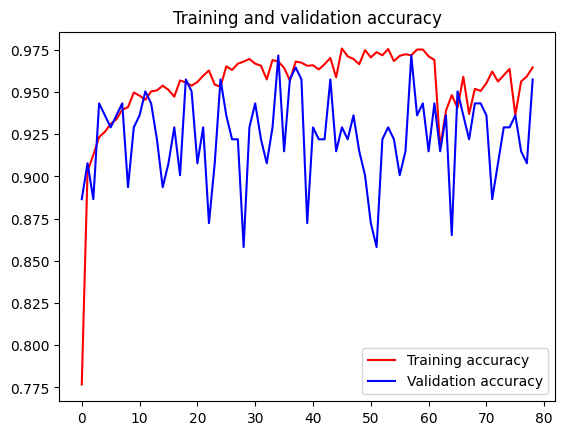

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [9]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.486882,0.848574,-1.008494e-06,0.692309,0.706953,-0.035040,0.799387,0.551255,-0.012334,0.753238,...,0.095553,0.272638,0.361109,0.058261,0.288172,0.439625,0.048772,0.322043,0.539168,0.058038
1,0.436762,0.507132,-3.561523e-07,0.543030,0.504540,-0.111552,0.665867,0.472674,-0.211763,0.757620,...,-0.271649,0.349115,0.357433,-0.379092,0.385724,0.460393,-0.385161,0.384594,0.502754,-0.372560
2,0.499623,0.807959,-1.231759e-06,0.712691,0.697068,-0.012687,0.814074,0.551507,0.047835,0.766878,...,0.182635,0.296288,0.368227,0.147496,0.288693,0.448195,0.129977,0.327409,0.547290,0.134370
6,0.610373,0.284746,-1.439194e-06,0.733493,0.334442,-0.096852,0.852108,0.411140,-0.217996,0.887565,...,-0.418374,0.471120,0.390496,-0.524509,0.511151,0.546027,-0.537537,0.558249,0.621865,-0.544693
7,0.882845,0.329751,-1.671242e-06,0.709773,0.412681,-0.076998,0.585746,0.460186,-0.173005,0.510893,...,-0.443474,0.868093,0.342472,-0.574900,0.870781,0.503733,-0.586404,0.877509,0.579682,-0.579909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.628611,0.805780,5.317990e-07,0.561234,0.797621,0.330842,0.502720,0.736674,0.555734,0.476530,...,0.259854,0.516139,0.359150,0.365898,0.474528,0.362861,0.392582,0.461996,0.355273,0.403934
279,0.302057,0.719433,-1.122252e-06,0.450796,0.569483,0.238269,0.559134,0.451613,0.425629,0.655585,...,0.451721,0.115176,0.597282,0.617042,0.168262,0.622068,0.664968,0.199499,0.625194,0.678254
282,0.308315,0.650525,-8.134304e-07,0.366324,0.495690,0.226016,0.463804,0.436277,0.436545,0.556778,...,0.571566,0.353400,0.711481,0.738022,0.408983,0.678616,0.758615,0.436373,0.643841,0.759680
289,0.629853,0.915415,5.892140e-07,0.487363,0.883983,0.304324,0.420284,0.783861,0.528235,0.409874,...,0.340495,0.727961,0.583841,0.484121,0.696379,0.661901,0.492834,0.677371,0.709384,0.478902


In [31]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.9574


[0.24383285641670227, 0.957446813583374]

In [32]:
y_hat = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


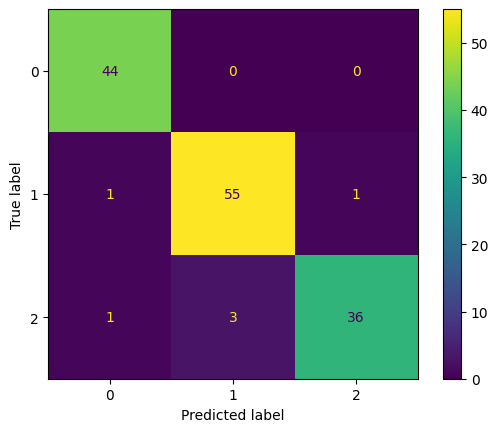

In [33]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
cm = confusion_matrix(np.argmax(y_test,axis=-1), np.argmax(y_hat,axis=-1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()